<a href="https://colab.research.google.com/github/won195/TIL/blob/master/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8A%A4%ED%85%8C%EC%9D%B4%EC%85%98_%EB%B3%91%EC%9B%90%EC%97%90%EC%84%9C_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_(%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8_%EC%84%B1%EB%8A%A5_%EC%A1%B0%EC%9D%B4%EA%B8%B0)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리
%matplotlib inline

!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', name='NanumBarunGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) #폰트설정

Selecting previously unselected package fonts-nanum.
(Reading database ... 120882 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [2]:
df1 = pd.read_csv('/content/drive/MyDrive/데이터스테이션/data/preprocessing.csv')
print(df1.shape)
df1.head(2)

(1894, 52)


,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1894 non-null   int64  
 1   환자ID                    1894 non-null   object 
 2   Large Lymphocyte        1894 non-null   float64
 3   Location of herniation  1894 non-null   int64  
 4   ODI                     462 non-null    float64
 5   가족력                     1843 non-null   float64
 6   간질성폐질환                  1894 non-null   int64  
 7   고혈압여부                   1894 non-null   int64  
 8   과거수술횟수                  1894 non-null   int64  
 9   당뇨여부                    1894 non-null   int64  
 10  말초동맥질환여부                1894 non-null   int64  
 11  빈혈여부                    1894 non-null   int64  
 12  성별                      1894 non-null   int64  
 13  스테로이드치료                 1894 non-null   int64  
 14  신부전여부                   1894 non-null   

In [4]:
df1.isnull().sum()

Unnamed: 0                   0
환자ID                         0
Large Lymphocyte             0
Location of herniation       0
ODI                       1432
가족력                         51
간질성폐질환                       0
고혈압여부                        0
과거수술횟수                       0
당뇨여부                         0
말초동맥질환여부                     0
빈혈여부                         0
성별                           0
스테로이드치료                      0
신부전여부                        0
신장                           0
심혈관질환                        0
암발병여부                        0
연령                           0
우울증여부                        0
입원기간                         0
입원일자                         0
종양진행여부                       0
직업                         415
체중                           0
퇴원일자                         0
헤모글로빈수치                      1
혈전합병증여부                      0
환자통증정도                       0
흡연여부                         0
통증기간(월)                      4
수술기법                        81
수술시간    

In [5]:
df2 = df1[["성별",'신장','체중','흡연여부','연령','혈액형','직업','재발여부']]
df3 = df2.dropna()
print(df3.shape)

(1479, 8)


In [6]:
X = df3.drop(columns='재발여부')
X1 = pd.get_dummies(X)
X1

,성별,신장,체중,흡연여부,연령,혈액형_RH+A,혈액형_RH+AB,혈액형_RH+B,혈액형_RH+O,직업_건설업,...,직업_사무직,직업_사업가,직업_예술가,직업_운동선수,직업_운수업,직업_의료직,직업_자영업,직업_주부,직업_특수전문직,직업_학생
0,2,163,60.3,0,66,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,171,71.7,0,47,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,178,77.1,0,39,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,174,74.2,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1,183,80.7,0,42,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,2,157,64.0,0,59,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1890,2,157,59.0,0,42,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1891,1,167,70.0,0,61,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1892,1,177,77.0,0,29,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
Y = df3["재발여부"]

In [12]:
Y.value_counts()

0    1302
1     177
Name: 재발여부, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline        import Pipeline
from sklearn.preprocessing   import MinMaxScaler
from sklearn.tree            import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics         import classification_report
from sklearn.tree            import plot_tree

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size = 0.3,
                                                    random_state = 1234)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1035, 26)
(1035,)
(444, 26)
(444,)


In [10]:
pipe_list = [('scaler', MinMaxScaler()),('model', DecisionTreeClassifier())]
pipe_model = Pipeline(pipe_list)
pipe_model

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', DecisionTreeClassifier())])

In [15]:
hyper_list = {'model__max_depth':range(2, 10),
              'model__min_samples_leaf':range(2, 10),
              'model__criterion':['gini', 'entropy'],
              'model__class_weight':[None, 'balanced'],
              'model__min_samples_split':range(2,10)}
grid_model = GridSearchCV(pipe_model, param_grid=hyper_list, scoring="f1",
                          n_jobs=-1,
                          cv = 5)
grid_model.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__class_weight': [None, 'balanced'],
                         'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': range(2, 10),
                         'model__min_samples_leaf': range(2, 10),
                         'model__min_samples_split': range(2, 10)},
             scoring='f1')

In [16]:
best_model = grid_model.best_estimator_

In [17]:
Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

In [18]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       911
           1       0.93      0.23      0.36       124

    accuracy                           0.91      1035
   macro avg       0.92      0.61      0.66      1035
weighted avg       0.91      0.91      0.88      1035



In [20]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       391
           1       0.56      0.09      0.16        53

    accuracy                           0.88       444
   macro avg       0.72      0.54      0.55       444
weighted avg       0.85      0.88      0.84       444



In [25]:
col_name = X_train.columns

In [26]:
best_model["model"]

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=6)

In [29]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

<ipython-input-29-9558739c1801>:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


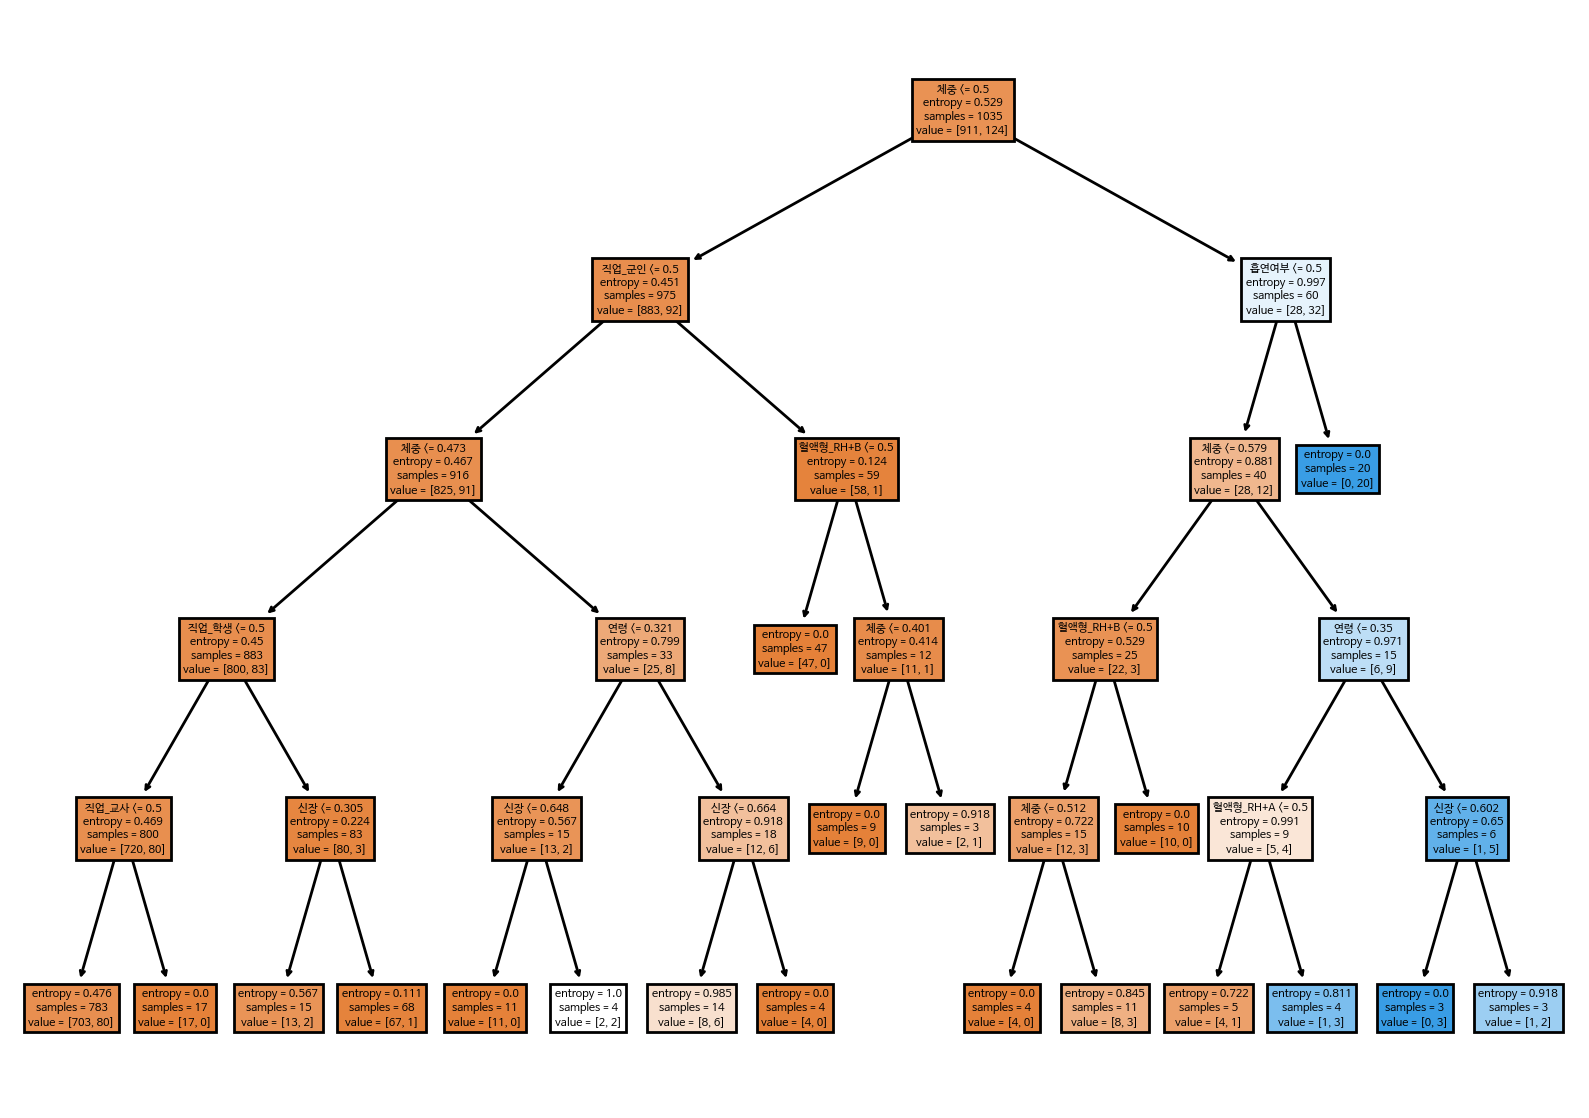

In [30]:
plt.figure(figsize=(10, 7))
plot_tree(best_model["model"], feature_names=col_name, filled=True)
plt.show()

In [32]:
df_importance = pd.DataFrame()
df_importance["Feature"] = col_name
df_importance["Importance"] = best_model["model"].feature_importances_

In [41]:
order_list = df_importance.sort_values(by='Importance', ascending=False).head(5)["Feature"].tolist()

<Axes: xlabel='Feature', ylabel='Importance'>

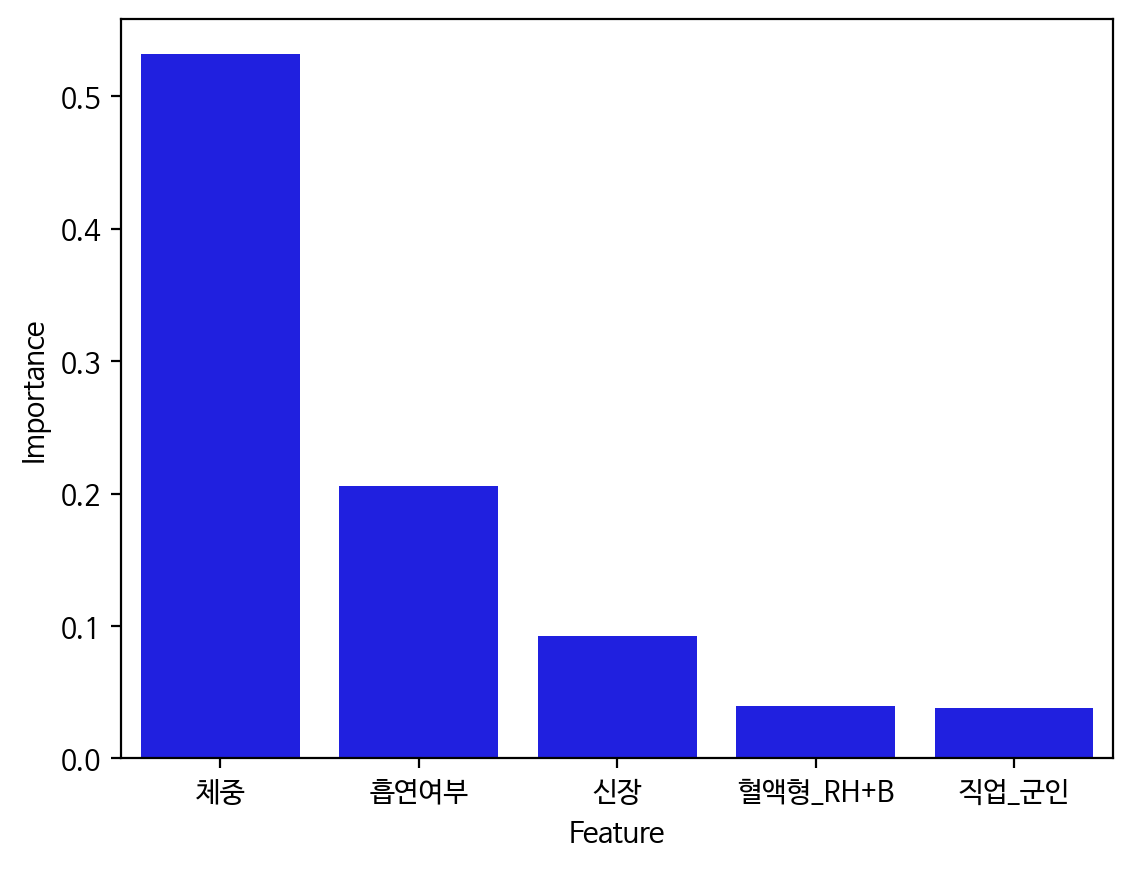

In [43]:
sns.barplot(data=df_importance, x="Feature", y='Importance', color="b", order=order_list)